<a href="https://colab.research.google.com/github/Bhuvi237/Task-7-Breast-Cancer-Using-SVM-/blob/main/Breast_cancer_dataset_using_svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from matplotlib.colors import ListedColormap

In [4]:
# Load Dataset
breast_cancer = pd.read_csv('/content/breast-cancer.csv')

In [5]:
breast_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
breast_cancer.shape

(569, 32)

In [7]:
breast_cancer.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [39]:
#splitting features and target
x=breast_cancer.drop('diagnosis',axis=1)
y=breast_cancer['diagnosis']

In [40]:
# Standardize Features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [41]:
# Split Data
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [37]:
# SVM with Linear Kernel
svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(x_train, y_train)
y_pred_linear = svm_linear.predict(x_test)
print("Linear Kernel Accuracy:", accuracy_score(y_test, y_pred_linear))

Linear Kernel Accuracy: 0.956140350877193


In [38]:
# SVM with RBF Kernel
svm_rbf = SVC(kernel='rbf', C=1, gamma='scale')
svm_rbf.fit(x_train, y_train)
y_pred_rbf = svm_rbf.predict(x_test)
print("RBF Kernel Accuracy:", accuracy_score(y_test, y_pred_rbf))

RBF Kernel Accuracy: 0.9824561403508771


In [15]:
# Hyperparameter Tuning with GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100],'gamma': ['scale', 0.01, 0.1, 1, 10],'kernel': ['rbf']}
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)


Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best CV Score: 0.9736263736263737


In [17]:
# Cross-Validation Score for Best Model
best_model = grid_search.best_estimator_
cv_scores = cross_val_score(best_model, x_scaled, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))


Cross-Validation Scores: [0.97368421 0.95614035 1.         0.96491228 0.97345133]
Mean CV Accuracy: 0.9736376339077782


In [18]:
# PCA for Visualization (2D projection)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(x_scaled)

In [19]:
# Train on 2D data for visualization
svm_vis = SVC(kernel='rbf', C=grid_search.best_params_['C'],gamma=grid_search.best_params_['gamma'])
svm_vis.fit(X_pca, y)

SVC(C=1)

In [20]:
# Create mesh grid
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),np.linspace(y_min, y_max, 500))

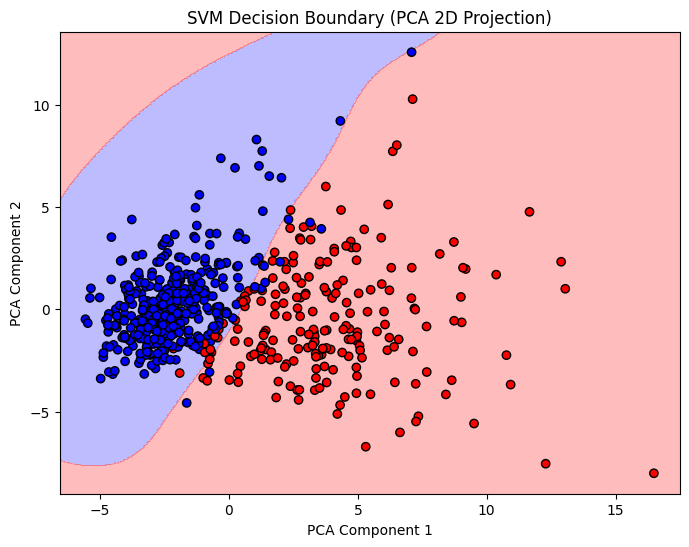

In [36]:
# Predict over grid
Z = svm_vis.predict(np.c_[xx.ravel(), yy.ravel()])

# Map string labels ('M', 'B') to integers
label_mapping = {label: idx for idx, label in enumerate(np.unique(y))}
Z_mapped = np.array([label_mapping[val] for val in Z])

# Reshape for contour plot
Z_mapped = Z_mapped.reshape(xx.shape)

# 9. Plot Decision Boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z_mapped, alpha=0.3, cmap=plt.cm.bwr)
plt.scatter(X_pca[:, 0], X_pca[:, 1],c=[label_mapping[val] for val in y],edgecolors='k', cmap=plt.cm.bwr)
plt.title("SVM Decision Boundary")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()